## Conectividad de Servicio de Internet

### Índice
1. [Descripción de los datos ](#id1)
2. [Outliers](#id2)
3. [Distribución de los datos](#id3)
4. [Visualización de los datos](#id4)
5. [Conclusión](#id5)
6. [Fuentes adicionales](#id6)

### 1. Descripción de los datos<a name="id1"></a>
Se describen la cantidad de registros y columnas con sus tipos de datos, ocupación en memoria y una estadística descriptiva de los mismos: cúal es el promedio, el desvío estandar, los cuartiles, todos medidas de tendencia central.

In [1]:
# se importa las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('../datasets/ConectividadalserviciodeInternet.csv', delimiter=';')

In [3]:
df.head()

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,--,--,--,--,--,--,--,SI,SI,6056020.0,"-38,6472605094596","-62,3200223419024"
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,--,--,--,--,--,--,--,--,--,6056020.0,"-38,7765069529222","-62,1851833537179"
2,BUENOS AIRES,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010.0,"-37,8482779294345","-58,2551665841248"
3,BUENOS AIRES,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020.0,"-37,9412057603","-58,3225920150442"
4,BUENOS AIRES,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030.0,"-37,6254980210026","-58,7461862359423"


In [4]:
# se averigua cúantos registros hay: 4312 registros
df.shape[0]

4312

In [5]:
# Se observa por columna: la cantidad de registro, el tipo de dato y si tiene valores nulos o no. 
# También se observa el uso de memoria.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   object 
 5   CABLEMODEM     4312 non-null   object 
 6   DIALUP         4312 non-null   object 
 7   FIBRAOPTICA    4312 non-null   object 
 8   SATELITAL      4312 non-null   object 
 9   WIRELESS       4312 non-null   object 
 10  TELEFONIAFIJA  4312 non-null   object 
 11  3G             4312 non-null   object 
 12  4G             4312 non-null   object 
 13  link           4300 non-null   float64
 14  Latitud        4312 non-null   object 
 15  Longitud       4312 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 539.1+ KB


In [6]:
# Se pasan algunas variables a categóricas
df['Provincia']   = df['Provincia'].astype('category')
df['Partido']     = df['Partido'].astype('category')
df['Localidad']   = df['Localidad'].astype('category')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Provincia      4312 non-null   category
 1   Partido        4312 non-null   category
 2   Localidad      4312 non-null   category
 3   Poblacion      4312 non-null   int64   
 4   ADSL           4312 non-null   object  
 5   CABLEMODEM     4312 non-null   object  
 6   DIALUP         4312 non-null   object  
 7   FIBRAOPTICA    4312 non-null   object  
 8   SATELITAL      4312 non-null   object  
 9   WIRELESS       4312 non-null   object  
 10  TELEFONIAFIJA  4312 non-null   object  
 11  3G             4312 non-null   object  
 12  4G             4312 non-null   object  
 13  link           4300 non-null   float64 
 14  Latitud        4312 non-null   object  
 15  Longitud       4312 non-null   object  
dtypes: category(3), float64(1), int64(1), object(11)
memory usage: 639.1+ KB


In [9]:
df.describe()
# Se puede observar que no hay valores nulos o en cero asimismo también antes se visualiza que no hay valores nulos.

,Poblacion,link
count,4.312000e+03,4.300000e+03
mean,8.693093e+03,3.909872e+07
std,3.821544e+04,2.939305e+07
min,0.000000e+00,2.000010e+06
25%,1.160000e+02,1.009104e+07
50%,5.755000e+02,3.401053e+07
75%,3.202000e+03,6.612602e+07
max,1.317298e+06,9.401402e+07


Como primer observación  vemos que en población presenta un valor minimo de 0. Entonces signica que hay registros con valor 0. ¿cuáles?

In [10]:
print(df[df['Poblacion'] == 0])

         Provincia            Partido                Localidad  Poblacion  \
0     BUENOS AIRES       Bahía Blanca            Villa Bordeau          0   
1     BUENOS AIRES       Bahía Blanca             Villa Espora          0   
16    BUENOS AIRES  General Las Heras                   Lozano          0   
19    BUENOS AIRES    General Lavalle  Chacras de San Clemente          0   
50    BUENOS AIRES             Tandil           Desvío Aguirre          0   
...            ...                ...                      ...        ...   
4295        CHUBUT          Escalante      Barrio Restinga Ali          0   
4296        CHUBUT          Escalante    Barrio Rodriguez Peña          0   
4297        CHUBUT          Escalante          Barrio Saavedra          0   
4298        CHUBUT          Escalante         Barrio Sarmiento          0   
4299        CHUBUT          Escalante    Barrio Villa S.U.P.E.          0   

     ADSL CABLEMODEM DIALUP FIBRAOPTICA SATELITAL WIRELESS TELEFONIAFIJA  3

Se puede deducir que en estas provincias se tiene acceso a internet en algunas tecnologías pero que no tienen demanda.
Por ejemplo para  Villa Bordeau, Bahía Blanca no tienen demanda (Poblacion = 0) pero tienen tecnologia 3G.
Es decir se puede aprovechar esta **oportunidad de crecimiento** ya que hay algunas tecnologías dispuestas para **potenciar la demanda del servicio a internet**. 

Ahora bien veamos si hay registros duplicados con igual nombre de Provincia, Partido y Localidad, analizar cada caso si es posible.

In [12]:
print(len(df[df[['Provincia','Partido','Localidad']].duplicated()]), 'registros')
print(df[df[['Provincia','Partido','Localidad']].duplicated()])

6 registros
         Provincia       Partido        Localidad  Poblacion ADSL CABLEMODEM  \
243     ENTRE RIOS         Colón           Hocker          0   --         --   
651        TUCUMAN     Cruz Alta         Lastenia          0   --         --   
1633     RIO NEGRO  General Roca  Barrio La Costa         94   --         --   
2386    ENTRE RIOS        Paraná       El Ramblón          0   --         --   
3366  BUENOS AIRES      La Plata     ruta del sol       2312   SI         --   
4122      LA RIOJA     Sanagasta  Villa Sanagasta          0   --         SI   

     DIALUP FIBRAOPTICA SATELITAL WIRELESS TELEFONIAFIJA  3G  4G        link  \
243      --          --        --       --            --  --  SI  30008100.0   
651      --          --        --       --            --  SI  SI  90014090.0   
1633     --          --        --       SI            --  --  --  62042200.0   
2386     --          --        --       SI            --  --  SI  30084095.0   
3366     --          --    

Hay 6 registros duplicados, se ve cada caso:

In [13]:
# Se tomar los primeros registros y compara los resultados;
print(df[(df['Provincia'] == 'ENTRE RIOS') & (df['Partido'] == 'Colón') & (df['Localidad'] == 'Hocker')])

      Provincia Partido Localidad  Poblacion ADSL CABLEMODEM DIALUP  \
200  ENTRE RIOS   Colón    Hocker         98   --         --     --   
243  ENTRE RIOS   Colón    Hocker          0   --         --     --   

    FIBRAOPTICA SATELITAL WIRELESS TELEFONIAFIJA  3G  4G        link  \
200          --        --       SI            --  --  SI  30008100.0   
243          --        --       --            --  --  SI  30008100.0   

               Latitud           Longitud  
200  -32,0874958453901  -58,3417058444451  
243  -32,0874958453901  -58,3417058444451  


Para ENTRE RIOS, Colón, Hocker, la diferencia radica en el valor de la población y que cuando población = 98 acceden por Wireless y 4G. Cuando la población es 0 solo 4G. Se elimina el registro de población = 0. Tomando el otro registro como el correcto.

In [14]:
df.drop([243], axis=0, inplace=True)

In [15]:
# TUCUMAN     Cruz Alta         Lastenia
print(df[(df['Provincia'] == 'TUCUMAN') & (df['Partido'] == 'Cruz Alta') & (df['Localidad'] == 'Lastenia')])

    Provincia    Partido Localidad  Poblacion ADSL CABLEMODEM DIALUP  \
650   TUCUMAN  Cruz Alta  Lastenia          0   --         --     --   
651   TUCUMAN  Cruz Alta  Lastenia          0   --         --     --   

    FIBRAOPTICA SATELITAL WIRELESS TELEFONIAFIJA  3G  4G        link  \
650          --        --       --            --  SI  SI  90014090.0   
651          --        --       --            --  SI  SI  90014090.0   

               Latitud           Longitud  
650  -26,8621611908602  -65,1625825810305  
651  -26,8498779490703  -65,1293137289629  


En el caso de Lastenia, Cruz Alta, Provincia de TUCUMAN los registros son iguales, se elimina el de idex 651.             

In [16]:
df.drop([651], axis=0, inplace=True)

In [17]:
# RIO NEGRO  General Roca  Barrio La Costa
print(df[(df['Provincia'] == 'RIO NEGRO') & (df['Partido'] == 'General Roca') & (df['Localidad'] == 'Barrio La Costa')])

      Provincia       Partido        Localidad  Poblacion ADSL CABLEMODEM  \
1632  RIO NEGRO  General Roca  Barrio La Costa         94   --         --   
1633  RIO NEGRO  General Roca  Barrio La Costa         94   --         --   

     DIALUP FIBRAOPTICA SATELITAL WIRELESS TELEFONIAFIJA  3G  4G        link  \
1632     --          --        --       --            --  --  --  62042200.0   
1633     --          --        --       SI            --  --  --  62042200.0   

                Latitud           Longitud  
1632  -39,0753070627553  -67,5392261916358  
1633  -39,0753070627553  -67,5392261916358  


En este caso ambos registros tienen los mismos valores a excepción que en un registro, WIRELESS esta en *--* y en el otro, con valor *SI*. Se toma como válido este último registro y se elimina el de index 1632.

In [18]:
df.drop([1632], axis=0, inplace=True)

In [19]:
# ENTRE RIOS        Paraná       El Ramblón
print(df[(df['Provincia'] == 'ENTRE RIOS') & (df['Partido'] == 'Paraná') & (df['Localidad'] == 'El Ramblón')])

       Provincia Partido   Localidad  Poblacion ADSL CABLEMODEM DIALUP  \
2385  ENTRE RIOS  Paraná  El Ramblón          0   --         --     --   
2386  ENTRE RIOS  Paraná  El Ramblón          0   --         --     --   

     FIBRAOPTICA SATELITAL WIRELESS TELEFONIAFIJA  3G  4G        link  \
2385          --        --       --            --  --  SI  30084095.0   
2386          --        --       SI            --  --  SI  30084095.0   

                Latitud           Longitud  
2385  -31,8480473768248  -60,0927487719843  
2386  -31,8480473768248  -60,0927487719843  


Mismo caso que el anterior, se elimina el index 2385 para ENTRE RIOS, Paraná, El Ramblón.

In [20]:
df.drop([2385], axis=0, inplace=True)

In [21]:
# BUENOS AIRES      La Plata     ruta del sol
print(df[(df['Provincia'] == 'BUENOS AIRES') & (df['Partido'] == 'La Plata') & (df['Localidad'] == 'ruta del sol')])

         Provincia   Partido     Localidad  Poblacion ADSL CABLEMODEM DIALUP  \
3365  BUENOS AIRES  La Plata  ruta del sol          0   SI         --     --   
3366  BUENOS AIRES  La Plata  ruta del sol       2312   SI         --     --   

     FIBRAOPTICA SATELITAL WIRELESS TELEFONIAFIJA  3G  4G       link  \
3365          --        --       --            --  SI  SI  6441050.0   
3366          --        --       --            --  SI  SI  6441050.0   

                Latitud           Longitud  
3365  -34,9437333541431  -58,1732652389706  
3366  -34,9437333541431  -58,1732652389706  


Para Ruta del Sol, La Plata, Buenos Aires, los registros duplicados se diferencian en su campo Poblacion. Se elije el registro que tiene Poblacion = 2312, eliminando el de index 3365.

In [22]:
df.drop([3365], axis=0, inplace=True)

In [23]:
# LA RIOJA     Sanagasta  Villa Sanagasta
print(df[(df['Provincia'] == 'LA RIOJA') & (df['Partido'] == 'Sanagasta') & (df['Localidad'] == 'Villa Sanagasta')])

     Provincia    Partido        Localidad  Poblacion ADSL CABLEMODEM DIALUP  \
4121  LA RIOJA  Sanagasta  Villa Sanagasta       2275   --         --     --   
4122  LA RIOJA  Sanagasta  Villa Sanagasta          0   --         SI     --   

     FIBRAOPTICA SATELITAL WIRELESS TELEFONIAFIJA  3G  4G        link  \
4121          --        --       --            --  SI  SI  46126010.0   
4122          SI        SI       SI            SI  SI  SI  46126010.0   

                Latitud           Longitud  
4121  -29,3064491456943  -67,0414097362521  
4122  -29,3064491456943  -67,0414097362521  


Este último registro, no se elimina, se deduce que de una población de 2275, los accesos son por 3G Y 4G. Pero aparte del acceso movil, tenemos otras tecnologias como fibra 
optica, satelital, wireless y pot telefonia fija.

### 2. Outliers<a name="id2"></a>
Detección de valores atípicos.

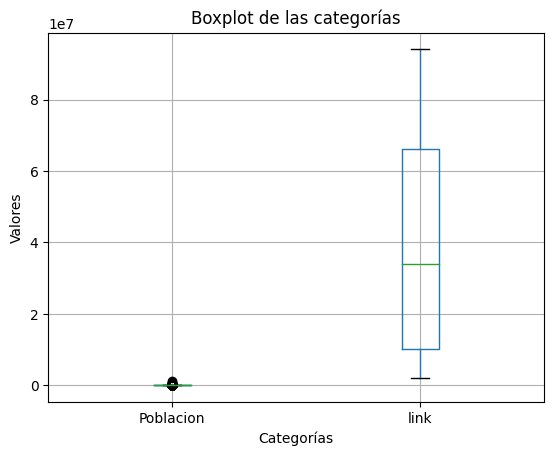

In [24]:
# Se averigua datos outliers para las variables cualitativas, se crea boxplot para las columnas de interés.

columnas = ['Poblacion', 'link']

df[columnas].boxplot()

plt.xlabel('Categorías')
plt.ylabel('Valores')
plt.title('Boxplot de las categorías')

plt.show()

Con el gráfico de cajas, se puede observar valores atipicos en la columna de Población..
Se indaga cúales son esos registros.

# Metodo de la Regla de las Tres Sigmas
mínimo = Promedio – 3 * Desviación Estándar
máximo = Promedio + 3 * Desviación Estándar

In [25]:
minimo = df['Poblacion'].mean() - 3 * df['Poblacion'].std()
print(minimo)

-106006.26545548937


In [26]:
maximo = df['Poblacion'].mean() + 3 * df['Poblacion'].std()
print(maximo)

123412.5923651713


In [27]:
atípicos = df[df['Poblacion'] > maximo]
print(len(atípicos), 'registros')
print(atípicos)


52 registros
                Provincia                 Partido  \
48                  CHACO            San Fernando   
134          BUENOS AIRES      General Pueyrredón   
139                  CABA               COMUNA 05   
140                CHUBUT               Escalante   
210          BUENOS AIRES              San Miguel   
216          BUENOS AIRES             San Nicolás   
251                  CABA               COMUNA 13   
315          BUENOS AIRES                   Merlo   
368          BUENOS AIRES                  Moreno   
392                  CABA               COMUNA 06   
409                  CABA               COMUNA 14   
418               FORMOSA                 Formosa   
449               MENDOZA              Godoy Cruz   
626               TUCUMAN                 Capital   
897   SANTIAGO DEL ESTERO                 Capital   
957              SANTA FE              La Capital   
1020             SANTA FE                 Rosario   
1114             SAN LUIS        

Ahora se ve con el método de rango intercuartílico o IQR (método de Tukey's fences)

In [28]:

# Calcular los límites para los outliers
Q1 = df['Poblacion'].quantile(0.25)
Q3 = df['Poblacion'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
print(limite_inferior, ' lim inferior - ', limite_inferior, 'limite_superior',limite_superior)
# Filtrar los registros que contienen outliers en la columna 'Fibra óptica'
outliers = df.loc[(df['Poblacion'] < limite_inferior) | (df['Poblacion'] > limite_superior)]
print(len(outliers), 'registros')
print(outliers)

-4525.25  lim inferior -  -4525.25 limite_superior 7852.75
679 registros
         Provincia                  Partido  \
2     BUENOS AIRES                 Balcarce   
8     BUENOS AIRES                 Baradero   
14    BUENOS AIRES        General Las Heras   
24    BUENOS AIRES              General Paz   
30    BUENOS AIRES                Magdalena   
...            ...                      ...   
4302         CHACO    Mayor Luis J. Fontana   
4305         CHACO                O Higgins   
4306         CHACO  Presidencia de la Plaza   
4307         CHACO                Quitilipi   
4309         CHACO             San Fernando   

                               Localidad  Poblacion ADSL CABLEMODEM DIALUP  \
2                               Balcarce      38376   SI         SI     SI   
8                               Baradero      28537   SI         SI     --   
14    General Las Heras (Est. Las Heras)      11331   SI         SI     SI   
24                               Ranchos       791

En base a los distintos resultados de los métodos de detección de autliers, se afirmar (lo mismo que en caso del EDA del acceso de internet por tecnología) que esto se debe a que el método de tres sigmas se basa en la desviación estándar de los datos y asume que los datos siguen una distribución normal, mientras que el método de Tukey es más robusto y no asume una distribución específica. El método de Tukey es especialmente útil cuando los datos no siguen una distribución normal o cuando hay valores atípicos extremos en el conjunto de datos.

Asi que lo que sigue es ver la distribución de esta variable.

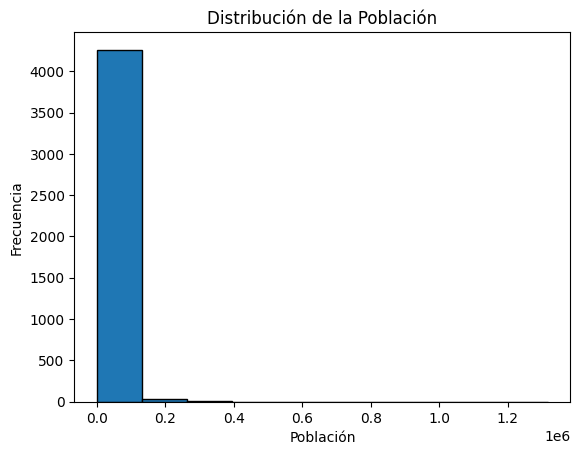

In [29]:
poblacion = df['Poblacion']

# Crear el gráfico de distribución
plt.hist(poblacion, bins=10, edgecolor='black')

# Etiquetas y título
plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Población')

plt.show()


Mucha información no se aprecia, más que acotar que sigue una distribución sesgada a la izquierda por lo cual tomaria el método de Tukey's fences

### 4. Métricas <a name="id4"></a>

<ul>
<li> **Tasa de conversion de localidades actuales**. Tasas de conversión de los clientes que demanda (localidades que registran accesos) sobre el total de clientes interesados (localidades con y sin accesos). </li>
<li> **Total de accesos actuales ** (o en base al periodo 2022).</li>
<li> **Porcentaje de accesos con fibra óptica**.</li>
<li> **Porcentaje de accesos con cablemodem**.</li>
</ul>

In [39]:
total_localidades = len(df)

localidades_con_acceso = len(df[df['Poblacion'] > 0])

localidades_sin_acceso = len(df[df['Poblacion'] == 0])

print('Se registran', total_localidades, 'localidades, de las cuales,',localidades_con_acceso, 'son clientes y', localidades_sin_acceso, 'son clientes potenciales')


Se registran 4307 localidades, de las cuales, 3765 son clientes y 542 son clientes potenciales


In [42]:
tasa_conversion = localidades_con_acceso/total_localidades
print(tasa_conversion*100)

87.41583468771766


In [43]:
print((localidades_sin_acceso/total_localidades) *100)

12.58416531228233


In [55]:
# ver porcentaje de localidades en poblacion = 0 pero con acceso a fibra optica y sin acceso.
localidades_sin_acceso_fo = len(df[(df['Poblacion'] == 0) & (df['FIBRAOPTICA'] == '--')])
localidades_con_acceso_fo = len(df[(df['Poblacion'] == 0) & (df['FIBRAOPTICA'] == 'SI')])

print('De las localidades potenciales (',localidades_sin_acceso,'): ',localidades_con_acceso_fo,'tienen acceso a fibra óptica y',localidades_sin_acceso_fo,'no poseen acceso.')

De las localidades potenciales ( 542 ):  76 tienen acceso a fibra óptica y 466 no poseen acceso.


In [56]:
print('El ',(localidades_con_acceso_fo/localidades_sin_acceso) *100,' tiene acceso a fibra optica')

El  14.022140221402212  tiene acceso a fibra optica


In [57]:
print('El ',(localidades_sin_acceso_fo/localidades_sin_acceso) *100,' no tiene acceso a fibra optica')

El  85.97785977859779  no tiene acceso a fibra optica


In [58]:
# ver porcentaje de localidades en poblacion = 0 pero con acceso a cablemodem y sin acceso.
localidades_sin_acceso_CM = len(df[(df['Poblacion'] == 0) & (df['CABLEMODEM'] == '--')])
localidades_con_acceso_CM = len(df[(df['Poblacion'] == 0) & (df['CABLEMODEM'] == 'SI')])

print('De las localidades potenciales (',localidades_sin_acceso,'): ',localidades_con_acceso_CM,'tienen acceso a CABLEMODEM y',localidades_sin_acceso_CM,'no poseen acceso.')

De las localidades potenciales ( 542 ):  24 tienen acceso a CABLEMODEM y 518 no poseen acceso.


In [53]:
print('El ',(localidades_con_acceso_CM/localidades_sin_acceso) *100,' tiene acceso a cablemodem')

El  4.428044280442804  tiene acceso a cablemodem


In [54]:
print('El ',(localidades_sin_acceso_CM/localidades_sin_acceso) *100,' no tiene acceso a cablemodem')

El  95.5719557195572  no tiene acceso a cablemodem


In [30]:
# Exportamos el dataset sin duplicados
df.to_csv('../datasets/ConectividadalserviciodeInternet_limpiado.csv', encoding="utf-8", index=False, sep=";")

In [31]:
# Se exportan estos datos para cumplimentar el kpi
df_expansion = df[df['Poblacion'] == 0]
df_expansion.to_csv('../datasets/conectividadlocalidades_oportunidadExpansion.csv', encoding="utf-8", index=False, sep=";")

### 5. Conclusión <a name="id5"></a>
falta

### 6. Fuentes adicionales <a name="id6"></a>
Se consultaron las siguientes fuentes adicionales al análisis exploratorio de datos.

[^1]: Las ciudades más pobladas de Argentina. Fuente: https://www.argentina.gob.ar/pais/poblacion/centros